<h1>Búsqueda No Informada y Heurística</h1>
<p>
    En general, un problema de búsqueda se compone de:
    <ul>
        <li>Un nodo inicial</li>
        <li>Una función que devuelve los hijos del nodo</li>
        <li>Una función que booleana que devuelve TRUE si el nodo es uno de los objetivos</li>
        <li>Una función que devuelve la heurística del nodo</li>
    </ul>
</p>
La siguiente función provee una clase abstracta para un problema de búsqueda

In [1]:
class generic_search_problem(object):
    
    def is_goal(self,node,goal):
        raise NotImplementedError("is_goal")
    
    def get_children(self,node):
        raise NotImplementedError("get_children")
    
    def search(self):
        raise NotImplementedError("search")


Por ejemplo, si podemos representar el siguiente grafo de búsqueda:


In [15]:
from collections import deque

class bfs_search(generic_search_problem):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={a for a,b in self.edges} | {b for a,b in self.edges}
            
    def is_goal(self,node,goal):
        return node==goal

    def get_children(self,node):
        return {b for a,b in self.edges if a==node} 
    
    def search(self,start,goal):
        parents={}
        visited=set()
        parents.update({start:None})
        frontier=deque()
        frontier.append(start)
        while frontier:
            print('queue :',frontier)
            print('visited :',visited)
            print('--------')
            node=frontier.popleft()
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited and child not in frontier:
                    parents.update({child:node})
                    frontier.append(child)
        return parents

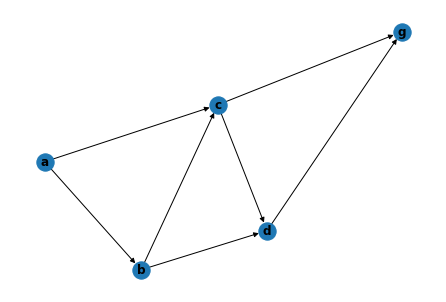

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

E={('a', 'b'),('a', 'c'),('b', 'c'),('c', 'd'),('b', 'd'),('d', 'g'),('c', 'g')}


G=nx.DiGraph()
G.add_edges_from(E)
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True, font_weight='bold')

plt.show()


In [18]:
bfs=bfs_search(E)
#print(bfs.get_children('a'))
bfs_tree=bfs.search('a','g')
#print(bfs_tree)

def get_path(search_results,goal):
    path=[goal]
    node=goal
    while search_results[node] is not None:
        parent=search_results[node]
        path.append(parent)
        node=parent
    return path
   
print('path : ',get_path(bfs_tree,'g'))

queue : deque(['a'])
visited : set()
--------
queue : deque(['c', 'b'])
visited : {'a'}
--------
queue : deque(['b', 'd', 'g'])
visited : {'c', 'a'}
--------
queue : deque(['d', 'g'])
visited : {'c', 'a', 'b'}
--------
queue : deque(['g'])
visited : {'d', 'c', 'a', 'b'}
--------
path :  ['g', 'c', 'a']


In [19]:
from heapq import heappush,heappop
import numpy as np

class puzzle(object):
    
    def __init__(self,node,level):
        self.state=node
        self.level=level
        
    def __hash__(self):
        return hash(np.array_str(self.state.ravel()))
        
    def __eq__(self,other):
        return np.array_equal(other.state,self.state)

    def __eq__(self,other):
        return np.array_equal(other.state,self.state)
    
    def __gt__(self,other):
        return self.level>other.level

    def __lt__(self,other):
        return self.level<other.level
   
    def pretty_print(self):
        return np.array_str(self.state.ravel())
 
    def solvable(self):
        return len([(a,b) for i,a in enumerate(self.state.ravel()) for b in self.state.ravel()[i:] if a>b & b!=0])%2==0
    
    def get_children(self):
        child_list=set()
        dim=self.state.shape[0]
        i,j=map(np.int,np.where(self.state==0))
        #print i,j
        if (j>0):
            child=self.state.copy()
            child[i,j]=self.state[i,j-1]
            child[i,j-1]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (j<dim-1):
            child=self.state.copy()
            child[i,j]=self.state[i,j+1]
            child[i,j+1]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (i>0):
            child=self.state.copy()
            child[i,j]=self.state[i-1,j]
            child[i-1,j]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        if (i<dim-1):
            child=self.state.copy()
            child[i,j]=self.state[i+1,j]
            child[i+1,j]=0
            p=puzzle(child,self.level+1)
            child_list.add(p)
        return child_list

In [20]:
dim=3

goal=puzzle(np.insert(np.arange(1,dim*dim),dim*dim-1,0).reshape(dim,dim),0)

easy_start=puzzle(np.insert(np.arange(1,dim*dim),6,0).reshape(dim,dim),0)


In [46]:
print('nodo objetivo : ')
print(goal.state)
print('nodo inicial : ')
print(easy_start.state)
print('hijos : ')
for p in easy_start.get_children():
    print(p.state)

nodo objetivo : 
[[1 2 3]
 [4 5 6]
 [7 8 0]]
nodo inicial : 
[[1 2 3]
 [4 5 6]
 [0 7 8]]
hijos : 
[[1 2 3]
 [4 5 6]
 [7 0 8]]
[[1 2 3]
 [0 5 6]
 [4 7 8]]


In [32]:
class bfs_puzzle(generic_search_problem):
    
    def __init__(self,start):
        self.state=start
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=deque() # queue
        frontier.append(self.state)
        while frontier:
            node=frontier.popleft()
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited and child not in frontier:
                    parents.update({child:node})
                    frontier.append(child)
        return parents
    
class dfs_puzzle(generic_search_problem):
    
    def __init__(self,start):
        self.state=start
            
    def is_goal(self,node,goal):
        return node==goal
    
    def get_children(self,node):
        return node.get_children()
    
    def search(self,goal):
        parents={}
        visited=set()
        parents.update({self.state:None})
        frontier=deque() # stack
        frontier.append(self.state)
        while frontier:
            node=frontier.pop()
            if self.is_goal(node,goal):
                return parents
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited and child not in frontier:
                    parents.update({child:node})
                    frontier.append(child)
        return parents

In [26]:
import sys
bfs_tree=bfs_puzzle(easy_start).search(goal)

for p in get_path(bfs_tree,goal):
    print(p.state)
    
sys.getsizeof(bfs_tree)     

[[1 2 3]
 [4 5 6]
 [7 8 0]]
[[1 2 3]
 [4 5 6]
 [7 0 8]]
[[1 2 3]
 [4 5 6]
 [0 7 8]]


368

In [ ]:
dfs_tree=dfs_puzzle(easy_start).search(goal)

sys.getsizeof(dfs_tree)  

<h2>Búsqueda Heurística</h2>
A diferencia de la búqueda no informada, la estrategia de búsqueda denominada best-first es un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)$ en cada momento.

In [14]:
from heapq import heappush,heappop

class bestfirst_search(generic_search_problem):
    
    def __init__(self,_edges,_heuristic):
        self.edges=_edges
        self.heuristic=_heuristic
        self.nodes={a for a,b in self.edges} | {b for a,b in self.edges}
        
    def is_goal(self,node,goal):
        return node==goal 

    def get_children(self,node):
        return {b for a,b in self.edges if a==node}
    
    def search(self,start,goal):
        parents={}
        visited=set()
        parents.update({start:None})
        frontier=[]
        heappush(frontier,(self.heuristic[start],start))
        while frontier:
            node=heappop(frontier)[1]
            if self.is_goal(node,goal):
                return parents
            for child in self.get_children(node):
                if child not in visited:
                    parents.update({child:node})
                    heappush(frontier,(self.heuristic[child],child))
                    visited.add(child)
        return parents


In [15]:
E={('a', 'b'),('a', 'c'),('b', 'c'),('c', 'd'),('b', 'd'),('d', 'g'),('c', 'g')}
H={'a':0,'b':3,'c':2,'d':1,'g':0}

bs=bestfirst_search(E,H)
bs.search('a','g')

{'a': None, 'b': 'a', 'c': 'a', 'd': 'c', 'g': 'c'}

la estrategia de búsqueda A* es también un método del tipo greedy que incorpora al costo $h(n)$ del nodo $n$ hacia el objetivo así como también el costo acumulado $g(n)$ de llegar hacia $n$. La estrategia de búsqueda greedy best-first selecciona el candidato $n \in \operatorname{GET\_CHILDREN}$ con
mejor puntuación $f(n) = h(n)+g(n)$ en cada momento.

In [16]:
E={('a', 'b'):1,('a', 'c'):3,('b', 'c'):1,('c', 'd'):1,('b', 'd'):3,('d', 'g'):1,('c', 'g'):3}
H={'a':0,'b':3,'c':2,'d':1,'g':0}

In [17]:
# Tarea implementar A* para incorporar el costo acumulado

from heapq import heappush,heappop

class astar_search(generic_search_problem):
    
    def __init__(self,_edges,_heuristic,_start,_goal):
        pass
    
    def start_node(self):
        pass
    
    def is_goal(self,node):
        pass
        
    def get_children(self,node):
        pass
        
    def search(self):
        pass
        


<h1>Implementación Puzzle 8</h1>
<p>
El problema del 8-puzzle fue inventado en 1870 y se juega en una grilla de 3x3 con 9 bloques cuadrados. Cada bloque tiene una etiqueta con un número del 1 al 8 y existe un espacio en blanco en el cual el jugador puede mover un bloque adyacente.   
</p>
    

In [5]:
from IPython.display import Image
#Image(filename='../figures/8_puzzle.png') 
    

<p>
Cada estado del puzzle puede ser visto como un vértice de un grafo tipo árbol, cuyo nodo raiz es el estado inicial del puzzle. Las estrategias de búsqueda no-informada no utilizan ningún criterio para ponderar las soluciones y por ende dependen en gran medida de la complejidad del problema.</p>
<p>
<ul>
<li>
De modo de diseñar algoritmos ''inteligentes'', es necesario reducir el espacio de b{usqueda y concentrarse en los estados que sean  atractivos.
</li>
<li>
Dado la alta complejidad de los problemas, no es posible recorrer todos los caminos y por lo tanto solo podemos evaluar estados que sean potencialmente atractivos.
<li>
La estrategia de búsqueda A* utiliza una combinación de búsqueda local:
</li>

\begin{align}
f(n)=g(n)+h(n)
\end{align}

Donde $g(n)$ corresponde al costo de la ruta desde el nodo inicial al nodo $n$ y $h(n)$ es el costo estimado (cota inferior) desde $n$ hasta el nodo objetivo.
</ul>

Para el problema del puzzle, utlizamos las siguientes heurísticas:

<ul>
<li>
Distancia Hamming : Número de bloques en la posición incorrecta.
</li>
<li>
Distancia Manhattan : Suma de las distancias (suma de la distancia horizontal y vertical) desde el bloque hasta la posición objetivo ($d_M=\vert X_n-X_g \vert + \vert Y_n-Y_g \vert$).
</li>


In [20]:
from IPython.display import Image
#Image(filename='../figures/8_puzzle_distancias.png') 

In [30]:
from heapq import heappush,heappop
import numpy as np

class puzzle(object):
    
    def __init__(self,node,level):
        self.state=node
        self.level=level
        
    def __hash__(self):
        return hash(np.array_str(self.state.ravel()))
        
    def __eq__(self,other):
        return np.array_equal(other.state,self.state)

    def __eq__(self,other):
        return np.array_equal(other.state,self.state)
    
    def __gt__(self,other):
        return self.level>other.level

    def __lt__(self,other):
        return self.level<other.level
   
    def pretty_print(self):
        return np.array_str(self.state.ravel())
 
    def solvable(self):
        return len([(a,b) for i,a in enumerate(self.state.ravel()) for b in self.state.ravel()[i:] if a>b & b!=0])%2==0
    
    def my_heuristic(self,alpha=2):
        dim=self.state.shape[0]
        return alpha*((dim*dim-2)-len([(a,b) for i,a in enumerate(random_start.state.ravel()) for b in random_start.state.ravel()[i:i+2] if b==a+1]))

    
def manhattan(node,goal):
    dim=node.state.shape[0]
    diff_mat=np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            if goal.state[i,j]!=0:
                u,v=map(np.int,np.where(node.state==goal.state[i,j]))
                diff_mat[i,j]=abs(i-u)+abs(j-v)
    return int(diff_mat.sum())

def hamming(node,goal):
    dim=node.state.shape[0]
    diff_mat=np.zeros((dim,dim))
    diff_mat=node.state!=goal.state
    dist=np.sum(diff_mat.astype(int).ravel())
    if dist>0:
        dist=dist-1
    return dist
    
class bestfirst_puzzle(generic_search_problem):
    
    def __init__(self,_heuristic):
        self.heuristic=_heuristic
        
    def is_goal(self,node,goal):
        return node==goal

    def get_children(self,node):
        child_list=set()
        dim=node.state.shape[0]
        i,j=map(np.int,np.where(node.state==0))
        #print i,j
        if (j>0):
            child=node.state.copy()
            child[i,j]=node.state[i,j-1]
            child[i,j-1]=0
            p=puzzle(child,node.level+1)
            child_list.add(p)
        if (j<dim-1):
            child=node.state.copy()
            child[i,j]=node.state[i,j+1]
            child[i,j+1]=0
            p=puzzle(child,node.level+1)
            child_list.add(p)
        if (i>0):
            child=node.state.copy()
            child[i,j]=node.state[i-1,j]
            child[i-1,j]=0
            p=puzzle(child,node.level+1)
            child_list.add(p)
        if (i<dim-1):
            child=node.state.copy()
            child[i,j]=node.state[i+1,j]
            child[i+1,j]=0
            p=puzzle(child,node.level+1)
            child_list.add(p)
        return child_list
    
    def search(self,start,goal):
        parents={}
        visited=set()
        parents.update({start:None})
        frontier=[]
        heappush(frontier,(self.heuristic(start,goal),start))
        while frontier:
            node=heappop(frontier)[1]
            if self.is_goal(node,goal):
                return parents,len(frontier),len(visited)
            visited.add(node)
            for child in self.get_children(node):
                if child not in visited:
                    parents.update({child:node})
                    heappush(frontier,(self.heuristic(child,goal),child))
        return parents,len(frontier),len(visited)

In [33]:
# nodo inicial y objetivo
dim=3

goal=puzzle(np.insert(np.arange(1,dim*dim),dim*dim-1,0).reshape(dim,dim),0)

easy_start=puzzle(np.insert(np.arange(1,dim*dim),6,0).reshape(dim,dim),0)
solver=bestfirst_puzzle(hamming)
solver_tree,k,h=solver.search(easy_start,goal)
path=get_path(solver_tree,goal)

for p in path:
    print(p.state,hamming(p,goal))
    print('---------------')
print('frontier : {0}, visited : {1}'.format(k,h))
    
while True:
    random_start=puzzle(np.random.permutation(np.arange(dim*dim)).reshape((dim,dim)),0)
    if random_start.solvable():
        break
solver_tree,k,h=solver.search(random_start,goal)
#path=get_path(solver_tree,goal)

    

[[1 2 3]
 [4 5 6]
 [7 8 0]] 0
---------------
[[1 2 3]
 [4 5 6]
 [7 0 8]] 1
---------------
[[1 2 3]
 [4 5 6]
 [0 7 8]] 2
---------------
frontier : 2, visited : 2


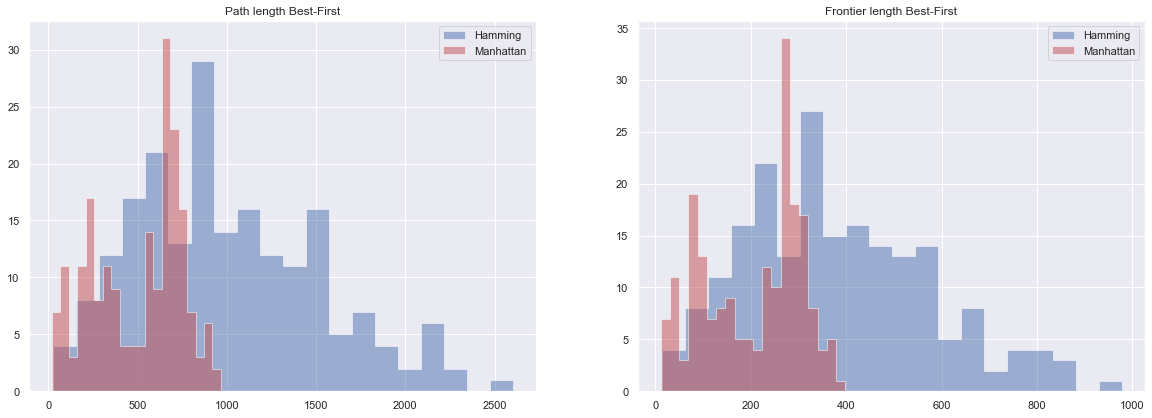

In [25]:
import seaborn as sns
sns.set(style="darkgrid")

hamming_path=[]
hamming_frontier=[]
manhattan_path=[]
manhattan_frontier=[]
solver1=bestfirst_puzzle(hamming)
solver2=bestfirst_puzzle(manhattan)
        
for i in range(200):
    while True:
        random_start=puzzle(np.random.permutation(np.arange(dim*dim)).reshape((dim,dim)),0)
        if random_start.solvable() : break
    p1,i,j=solver1.search(random_start,goal)
    p2,k,h=solver2.search(random_start,goal)
    hamming_path.append(j)
    hamming_frontier.append(i)
    manhattan_path.append(h)
    manhattan_frontier.append(k)
    

plt.figure(figsize=(20,15))
plt.plot([1,2,3])
plt.subplot(221)
plt.hist(hamming_path,bins=20 , histtype='stepfilled', color='b', alpha=0.5, label='Hamming')
plt.hist(manhattan_path,bins=20, histtype='stepfilled',  color='r', alpha=0.5, label='Manhattan') 
plt.title("Path length Best-First")
plt.legend()
plt.subplot(222)
plt.hist(hamming_frontier,bins=20, histtype='stepfilled',  color='b', alpha=0.5, label='Hamming') 
plt.hist(manhattan_frontier,bins=20, histtype='stepfilled', color='r', alpha=0.5, label='Manhattan') 
plt.title("Frontier length Best-First")
plt.legend()
plt.show()